In [18]:
import struct

def readImageFeatures(path):
    f = open(path, 'rb')
    while f:
        userId = f.read(10)
        userId = userId.strip()
        if userId == '': break
        feature = []
        for i in range(4096):
            feature.append(struct.unpack('f', f.read(4)))
        yield userId.decode('ascii'), feature
image_features = readImageFeatures("./image_features_tradesy.b")

In [19]:
data = readImageFeatures("./image_features_tradesy.b")

In [20]:
id, f = next(data)

In [21]:
len(f)

4096

In [22]:
id

'28836'

In [76]:
import gzip
import json
import os
import pickle
from tqdm import tqdm_notebook as tqdm

if not os.path.exists("./images/"):
    os.mkdir("./images/")

In [75]:
  
user_data = gzip.open("./tradesy_item_urls.json.gz", 'r').read()
user_data = user_data.decode("ascii")
l = user_data.split("\n")
img_list = [eval(obj) for obj in l[:-1]]

In [77]:
len(img_list)

349680

In [81]:
file_name = "./items.pickle"
with open(file_name, mode='rb') as f:
          items =  pickle.load(f)

In [82]:
items

['466',
 '459',
 '457',
 '449',
 '874',
 '861',
 '860',
 '857',
 '852',
 '850',
 '847',
 '842',
 '160',
 '143',
 '142',
 '141',
 '140',
 '139',
 '93',
 '88',
 '87',
 '84',
 '81',
 '70',
 '66',
 '63',
 '61',
 '60',
 '124',
 '122',
 '120',
 '118',
 '99',
 '2',
 '191237',
 '845',
 '833',
 '829',
 '598',
 '405835',
 '1324',
 '666',
 '654',
 '651',
 '650',
 '153',
 '152',
 '150',
 '145',
 '602',
 '155',
 '154',
 '148',
 '147',
 '146',
 '80',
 '78',
 '75',
 '158',
 '97',
 '163',
 '162',
 '161',
 '85',
 '83',
 '299',
 '298',
 '297',
 '296',
 '295',
 '293',
 '292',
 '277',
 '272',
 '262',
 '156',
 '114',
 '113',
 '107',
 '255307',
 '9571',
 '1160',
 '1153',
 '104',
 '103',
 '102',
 '98',
 '92',
 '1096',
 '340',
 '1047',
 '1046',
 '581',
 '579',
 '576',
 '574',
 '491',
 '489',
 '488',
 '482',
 '215',
 '190',
 '841',
 '769',
 '741',
 '164',
 '112',
 '111',
 '110',
 '106',
 '1116',
 '1115',
 '1114',
 '1222',
 '1122',
 '1121',
 '731',
 '729',
 '723',
 '718',
 '711',
 '706',
 '446',
 '443',
 '440',

In [53]:
import requests
def save_image(filename, image):
    with open(filename, "wb") as fout:
        fout.write(image)


def download_image(url, timeout = 10):
    response = requests.get(url, allow_redirects=False, timeout=timeout)
    if response.status_code != 200:
        e = Exception("HTTP status: " + response.status_code)
        raise e

    content_type = response.headers["content-type"]
    if 'image' not in content_type:
        e = Exception("Content-Type: " + content_type)
        raise e
    return response.content

In [85]:
no_image_items = []
for obj in tqdm(img_list): 
    try:
        img = download_image(obj["imageUrl"])
        image_path = os.path.join("./images/", obj["itemID"]+".jpg")
        save_image(image_path, img)
    except:
        no_image_items.append(obj["itemID"])            


100%|██████████| 349680/349680 [5:34:22<00:00, 17.43it/s]            


In [90]:
len(items)

32807

In [89]:
from glob import glob
import numpy as np
imgs = glob(os.path.join("./images", "*.jpg"))
imgs = np.sort(imgs)
len(imgs)

12442

In [96]:
imgs[0]
img = imread(imgs[0])
img.shape

(287, 203, 3)

In [94]:
import scipy
import scipy.misc
def imread(path):
    return scipy.misc.imread(path).astype(np.float)

def resize_width(image, width=64.):
    h, w = np.shape(image)[:2]
    return scipy.misc.imresize(image,[int((float(h)/w)*width),width])
        
def center_crop(x, height=64):
    h= np.shape(x)[0]
    j = int(round((h - height)/2.))
    return x[j:j+height,:,:]

def get_image(image_path, width=64, height=64):
    return center_crop(resize_width(imread(image_path), width = width),height=height)

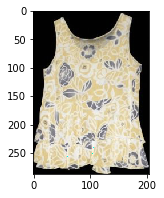

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))
ax.imshow(img, interpolation='nearest')